In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
accuracy_score, plot_roc_curve, roc_auc_score, recall_score,
precision_score, f1_score, classification_report, RocCurveDisplay)

IEEE-CIS works across a variety of AI and machine learning areas, including deep neural networks, fuzzy systems, evolutionary computation, and swarm intelligence. Today they’re partnering with the world’s leading payment service company, Vesta Corporation, seeking the best solutions for fraud prevention industry, and now you are invited to join the challenge.

In this competition, you’ll benchmark machine learning models on a challenging large-scale dataset. The data comes from Vesta's real-world e-commerce transactions and contains a wide range of features from device type to product features. You also have the opportunity to create new features to improve your results.

If successful, you’ll improve the efficacy of fraudulent transaction alerts for millions of people around the world, helping hundreds of thousands of businesses reduce their fraud loss and increase their revenue. And of course, you will save party people just like you the hassle of false positives.

Acknowledgements:

Vesta Corporation provided the dataset for this competition. Vesta Corporation is the forerunner in guaranteed e-commerce payment solutions. Founded in 1995, Vesta pioneered the process of fully guaranteed card-not-present (CNP) payment transactions for the telecommunications industry. Since then, Vesta has firmly expanded data science and machine learning capabilities across the globe and solidified its position as the leader in guaranteed ecommerce payments. Today, Vesta guarantees more than $18B in transactions annually.

#### About the data:

I found this data on a kaggle competition. Note that the test data, due to the nature of the competition, does not have the target values. For this purposes of this project, I will not be using the competition's test data since I am not submitting to kraggle, and therefore it is of no use for my modeling. 

- train_transaction.csv : The transaction dataset comprising the transaction details to be used for training the model.
- train_identity.csv : The identity dataset comprising the additional details about the identity of the payer and the merchant between whom the transaction was performed and the details of transactions are present in the train_transaction.csv.



#### Display all columns
This is a very large dataset both in columns and rows

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Import Data

In [3]:
data = pd.read_csv('./train_transaction.csv')

In [4]:
data.shape

(590540, 394)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [6]:
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [7]:
data_identity = pd.read_csv('./train_identity.csv')

In [8]:
data_identity.head(2)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device


### Let's make some of these into categorical dtypes
This is a large dataset and a few of these columns are in fact categorical, so let's change their dtype to save some space

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [10]:
data_categorical=['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',\
                 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

In [11]:
data[data_categorical] = data[data_categorical].astype('category')

In [12]:
data[data_categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   ProductCD      590540 non-null  category
 1   card1          590540 non-null  category
 2   card2          581607 non-null  category
 3   card3          588975 non-null  category
 4   card4          588963 non-null  category
 5   card5          586281 non-null  category
 6   card6          588969 non-null  category
 7   addr1          524834 non-null  category
 8   addr2          524834 non-null  category
 9   P_emaildomain  496084 non-null  category
 10  R_emaildomain  137291 non-null  category
 11  M1             319440 non-null  category
 12  M2             319440 non-null  category
 13  M3             319440 non-null  category
 14  M4             309096 non-null  category
 15  M5             240058 non-null  category
 16  M6             421180 non-null  category
 17  M7        

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: category(20), float64(371), int64(3)
memory usage: 1.7 GB


In [14]:
data_identity = data_identity.astype('category')

In [15]:
data_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   TransactionID  144233 non-null  category
 1   id_01          144233 non-null  category
 2   id_02          140872 non-null  category
 3   id_03          66324 non-null   category
 4   id_04          66324 non-null   category
 5   id_05          136865 non-null  category
 6   id_06          136865 non-null  category
 7   id_07          5155 non-null    category
 8   id_08          5155 non-null    category
 9   id_09          74926 non-null   category
 10  id_10          74926 non-null   category
 11  id_11          140978 non-null  category
 12  id_12          144233 non-null  category
 13  id_13          127320 non-null  category
 14  id_14          80044 non-null   category
 15  id_15          140985 non-null  category
 16  id_16          129340 non-null  category
 17  id_17     

#### Merge the the data and train data_identity dataframes

In [16]:
df = pd.merge(data, data_identity, on='TransactionID')

In [17]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,18.0,140.0,0.0,0.0,0.0,0.0,1803.0,49.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,15557.990234,169690.796875,0.0,0.0,0.0,515.0,5155.0,2840.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,

#### Are any of these transactions duplicates?


In [18]:
df.duplicated(subset='TransactionID').astype(int).sum()

0

### Exploring the Nulls

This dataset is very large and one way to contain it's size is to explore proportion of null values in each column to decide which should be dropped :)

In [19]:
# This clever function to calculate null values at mass scale was inspired by code from: https://jovian.ai/mr-priyankmishra/1-eda/v/1?utm_source=embed#C26

def na_stats(column, df):  
    '''
    Function to calculate relevant statistics regarding na values 
    in a given column of a dataframe.
    '''
    count = df[column].isna().sum()
    total_count = df.shape[0]
    na_proportion = np.round((count/total_count), 2)
    
    return (count, na_proportion)

In [20]:
def missing_train_info(df):
    '''
        Function to get information about missing values in the dataframe, 
        for each column the following information is given by this function.
       
            - Number of missing values present in the column.
            - Proportion of missing values in the column.
    '''
    
    columns_missing_info = []
    
    for column in df:
        count, na_proportion = na_stats(column, df);       
        if(count):
            columns_missing_info.append([column, count, na_proportion])
      
    column_names = ['column_name', 'missing_count', 'missing_proportion']
    
    missing_info_df = pd.DataFrame(data = columns_missing_info, columns = column_names)
    
    return missing_info_df

In [21]:
missing_train_df = missing_train_info(df)

In [22]:
missing_train_df.sort_values(by='missing_proportion', ascending=False).head(140)

,column_name,missing_count,missing_proportion
34,M9,144233,1.00
37,V3,144233,1.00
28,M3,144233,1.00
30,M5,144233,1.00
31,M6,144233,1.00
32,M7,144233,1.00
33,M8,144233,1.00
35,V1,144233,1.00
36,V2,144233,1.00
38,V4,144233,1.00


First on the chopping block are columns that have more than 50% nulls. As to whether to drop all columsn over say 50%, I would like to first see if there is any relationship between fraud and missing na's to make that determination

In [23]:
df.dropna(thresh=len(df) - 75052, axis=1, inplace=True)

#### High Correlations

Another way to contain the size of this matrix is to drop columns that are highly correlated. Let's explore which columns have too much correlation

The following code was altered from the following stackoverflow post:
    https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on

In [24]:
def drop_corr_features(df_model, target_var, threshold):
    # Calculate the correlation matrix
    corr_matrix = df_model.drop(target_var, 1).corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    dropped_feature = ""

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                col_value_corr = df_model[col.values[0]].corr(df_model[target_var])
                row_value_corr = df_model[row.values[0]].corr(df_model[target_var])
                if col_value_corr < row_value_corr:
                    drop_cols.append(col.values[0])
                    dropped_feature = "dropped: " + col.values[0]
                else:
                    drop_cols.append(row.values[0])
                    dropped_feature = "dropped: " + row.values[0]
                    
    drops = set(drop_cols)
    df_model = df_model.drop(columns=drops)

    print("dropped columns: ")
    print(list(drops))
    print("-----------------------------------------------------------------------------")
    print("used columns: ")
    print(df_model.columns.tolist())

    return df_model

I am going to delete all columns that have over 80% collinearity with another column, keeping the one that is least correlated with the target

In [25]:
df_trimmed = drop_corr_features(df, 'isFraud', .60)

/var/folders/64/vnlnt1cx08978qdm8xrbz0g00000gn/T/ipykernel_10346/1225075668.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  corr_matrix = df_model.drop(target_var, 1).corr()


dropped columns: 
['V262', 'V316', 'V209', 'V133', 'V176', 'V260', 'V298', 'V278', 'V191', 'V118', 'V328', 'V32', 'V109', 'V312', 'V194', 'V161', 'V222', 'V16', 'V103', 'V171', 'V179', 'V211', 'V149', 'V187', 'V102', 'V201', 'V261', 'V267', 'V166', 'V272', 'V202', 'V250', 'V236', 'V304', 'V189', 'V228', 'V256', 'V268', 'V152', 'V98', 'V238', 'V265', 'V284', 'V129', 'V110', 'V125', 'V142', 'V150', 'V232', 'C13', 'V245', 'C6', 'V204', 'V276', 'V294', 'V239', 'V178', 'V167', 'V339', 'V104', 'V274', 'V205', 'V132', 'V241', 'V254', 'V136', 'V300', 'V290', 'V213', 'V190', 'V119', 'C14', 'V168', 'V180', 'V221', 'V200', 'V224', 'C7', 'V302', 'V288', 'V324', 'V229', 'V233', 'V255', 'V313', 'V234', 'V223', 'V31', 'V243', 'V122', 'V24', 'V235', 'V329', 'V128', 'V130', 'V199', 'V248', 'V154', 'V327', 'V280', 'V258', 'V100', 'V185', 'V192', 'V164', 'V131', 'V124', 'V269', 'C4', 'V215', 'V242', 'V165', 'V148', 'V216', 'V182', 'V116', 'V22', 'V183', 'V198', 'V253', 'V188', 'V139', 'V273', 'V196', 'V2

In [26]:
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144233 entries, 0 to 144232
Data columns (total 85 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   TransactionID   144233 non-null  object  
 1   isFraud         144233 non-null  int64   
 2   TransactionDT   144233 non-null  int64   
 3   TransactionAmt  144233 non-null  float64 
 4   ProductCD       144233 non-null  category
 5   card1           144233 non-null  category
 6   card2           143331 non-null  category
 7   card3           144061 non-null  category
 8   card4           144049 non-null  category
 9   card5           143277 non-null  category
 10  card6           144055 non-null  category
 11  addr1           83786 non-null   category
 12  addr2           83786 non-null   category
 13  P_emaildomain   130842 non-null  category
 14  R_emaildomain   131083 non-null  category
 15  C2              144233 non-null  float64 
 16  C3              144233 non-null  float

In [27]:
df_trimmed.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,C2,C3,C5,C9,D1,D8,D9,D10,V12,V13,V14,V17,V21,V23,V28,V29,V30,V33,V107,V114,V117,V120,V138,V141,V147,V158,V162,V174,V197,V220,V240,V251,V257,V271,V289,V292,V301,V303,V305,V315,V325,V334,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,NaN,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.0,1.0,0.0,1.0,1.0,0.000000,0.0,0.0,0.0,70787.0,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,542.0,144.0,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,anonymous.com,NaN,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.0,1.0,0.0,1.0,1.0,0.000000,0.0,0.0,-5.0,98945.0,0.0,-5.0,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,621.0,500.0,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,credit,NaN,NaN,gmail.com,gmail.com,4.0,0.0,0.0,0.0,1.0,83.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,3.0,1.0,1.0,1.0,90.327904,2.0,4.0,1.0,1.0,1.0,90.327904,NaN,NaN,-5.0,191631.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,410.0,142.0,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,debit,NaN,NaN,hotmail.com,hotmail.com,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.0,1.0,0.0,1.0,1.0,0.000000,NaN,NaN,-5.0,221832.0,0.0,-6.0,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,176.0,507.0,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,debit,170.0,87.0,aol.com,NaN,1.0,0.0,0.0,0.0,0.0,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.0,1.0,0.0,1.0,1.0,0.000000,0.0,0.0,0.0,7460.0,1.0,0.0,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,529.0,575.0,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [28]:
df_trimmed.to_csv('./trimmed_data.csv', index=False)

### Recap

The origina dataset is quite large, and I have been able to bring down the number of rows from 400+ columns to 85 columns by 
- removing all columns with over 50% nan values
- removing columns that had collinearity with another column of over 60%

#### The V features

The v features are quite mysterious, these are Vesta engineered rich features, including ranking, counting, and other entity relations, that are not fully explained. 

I will conduct not conduct much EDA on those features since they are quite mysterious. 

### EDA

Recap of our data types:

- TransactionDT: Timedelta from a given reference datetime (not an actual timestamp)
- TransactionAMT: Transaction payment amount in USD
- ProductCD: Product code, the product for each transaction
- card1 - card6: Payment card information, such as card type, card category, issue bank, country, etc.
- addr: Address
- dist: Distance
- P_ and R_emaildomain: Purchaser and recipient email domain
- C1-C14: Counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
- D1-D15: Timedelta, such as days between previous transaction, etc.
- M1-M9: mMatch, such as names on card and address, etc.
- Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

Categorical Features: ProductCD, card1 - card6, addr1, addr2, P_emaildomain, R_emaildomain, M1 - M9

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions. They're collected by Vesta’s fraud protection system and digital security partners. (The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features: DeviceType, DeviceInfo, id_12 - id_38

### Explore categorical transaction data:

#### Explore transaction amts

In [29]:
df_trimmed['TransactionAmt'].describe()

count    144233.000000
mean         83.554533
std          99.850258
min           0.251000
25%          25.453000
50%          50.000000
75%         100.000000
max        1800.000000
Name: TransactionAmt, dtype: float64

We can see the transactions amount columns is heavily right skew with a mean of \\$83, but a max of \\$1800

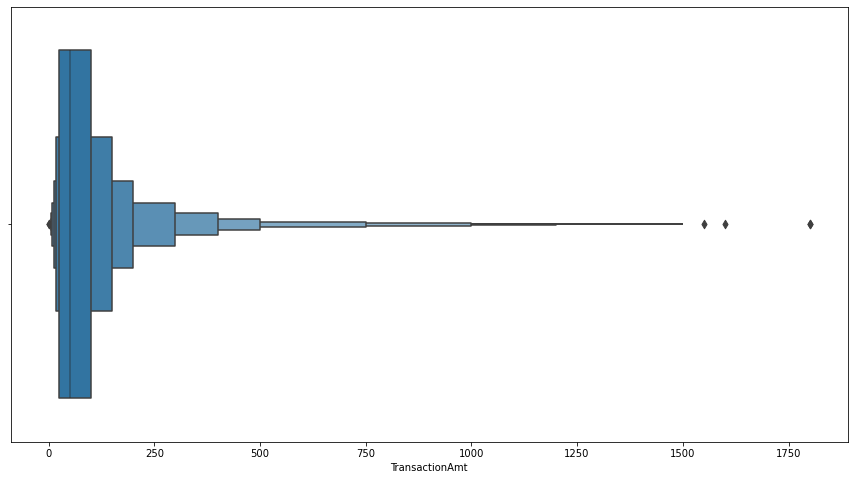

In [30]:
plt.figure(figsize=(15, 8))
sns.boxenplot(data=df_trimmed, x='TransactionAmt', orient='h');

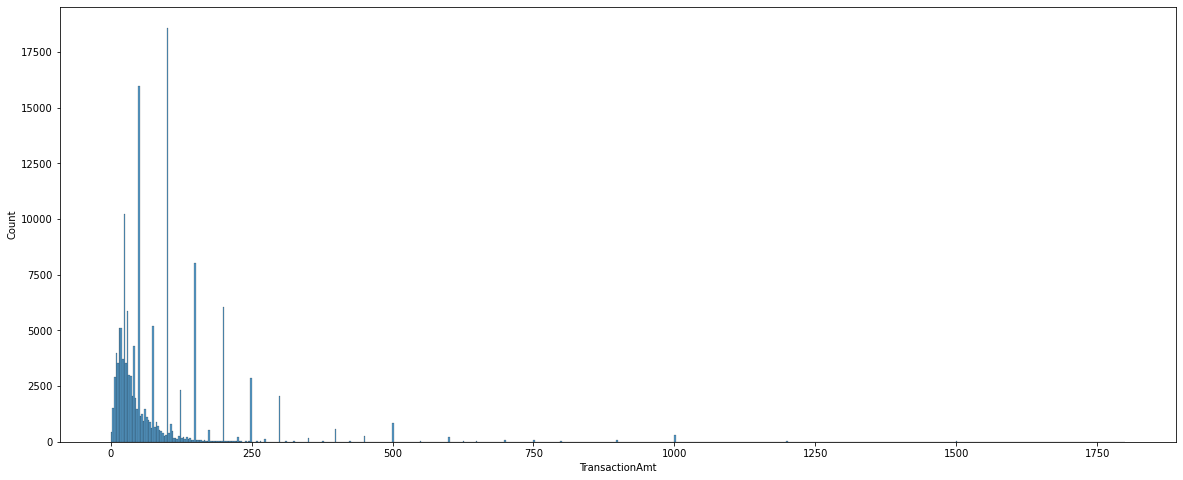

In [31]:
plt.figure(figsize=(20, 8))
sns.histplot(df_trimmed['TransactionAmt']);

While most transaction are of \\$250 or less, we see a few transactions that are above that range

Is there a relationship between fraud and transaction amt?

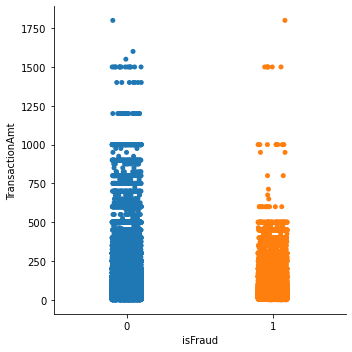

In [32]:
sns.catplot(data=df_trimmed, x='isFraud', y='TransactionAmt');

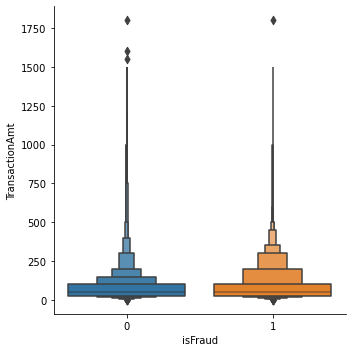

In [33]:
sns.catplot(data=df_trimmed, x='isFraud', y='TransactionAmt', kind='boxen');

I cannot dissern any significant difference between transaction amt and fraud

#### Explore product code

In [34]:
df_trimmed['ProductCD'].describe()

count     144233
unique         4
top            C
freq       62192
Name: ProductCD, dtype: object

In [35]:
df_trimmed['ProductCD'].value_counts()

C    62192
R    37548
H    32908
S    11585
W        0
Name: ProductCD, dtype: int64

/Users/luisagonzalez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


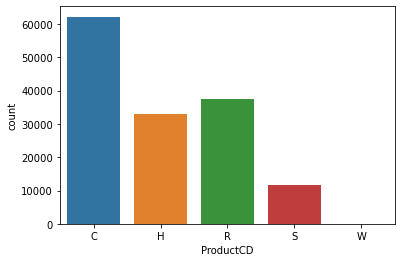

In [36]:
sns.countplot(df_trimmed['ProductCD']);

Most purchased product code is 'C'

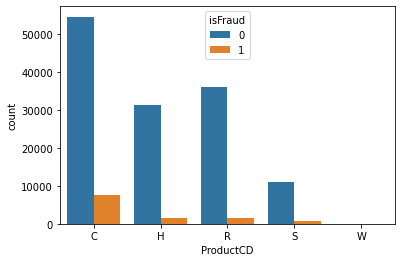

In [37]:
sns.countplot(x='ProductCD', data=df_trimmed, hue='isFraud');

There is no clear relationship between produce code and fraud

### Exploring card info
The 'card' group can be a little mysterious because each column except card4 and card6 are encoded and I am not sure what data those columns contain.

Remember, these are categorical columns

card1 - card6: Payment card information, such as card type, card category, issue bank, country, etc.

In [38]:
card_info = ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']

In [39]:
for col in card_info:
    print(f'{col}', df_trimmed[col].nunique())

card1 8499
card2 482
card3 103
card4 4
card5 106
card6 3


Above we can see that card1 column contains 8499 unique values, so I do not think I will be able to tell much from that column. 

#### Exploring issuing bank

In [40]:
df_trimmed['card4'].value_counts()

visa                89299
mastercard          44186
american express     8298
discover             2266
Name: card4, dtype: int64

Most transactions are visa or mastercard

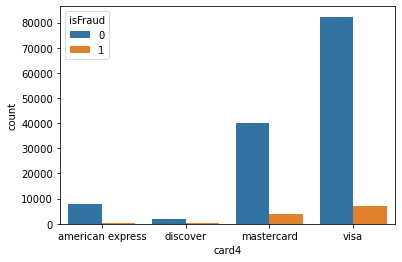

In [41]:
sns.countplot(x='card4', data=df_trimmed, hue='isFraud');

In [42]:
card_fraud = df_trimmed.groupby(['card4', 'isFraud']).count()[['C2']]


In [43]:
card_fraud.reset_index(inplace=True)

In [44]:
card_fraud

,card4,isFraud,C2
0,american express,0,8059
1,american express,1,239
2,discover,0,2089
3,discover,1,177
4,mastercard,0,40266
5,mastercard,1,3920
6,visa,0,82331
7,visa,1,6968


In [45]:
conditions = [
    (card_fraud['card4'] == 'american express'),
    (card_fraud['card4'] == 'discover'),
    (card_fraud['card4'] == 'mastercard'),
    (card_fraud['card4'] == 'visa')
    ]

# create a list of the values we want to assign for each condition
values = [card_fraud['C2']/8298, card_fraud['C2']/2266, card_fraud['C2']/44186, card_fraud['C2']/89299]

# create a new column and use np.select to assign values to it using our lists as arguments
card_fraud['fraud_prop'] = np.select(conditions, values)

# display updated DataFrame
card_fraud

,card4,isFraud,C2,fraud_prop
0,american express,0,8059,0.971198
1,american express,1,239,0.028802
2,discover,0,2089,0.921889
3,discover,1,177,0.078111
4,mastercard,0,40266,0.911284
5,mastercard,1,3920,0.088716
6,visa,0,82331,0.921970
7,visa,1,6968,0.078030


American express has the smallest proportion of fraudulent transactions with only 2% being fraud, whereas mastercard has 9% of transactions as fraud!

#### Explore 'credit' vs 'debit' transactions

In [46]:
df_trimmed['card6'].value_counts()

credit             75090
debit              68950
charge card           15
debit or credit        0
Name: card6, dtype: int64

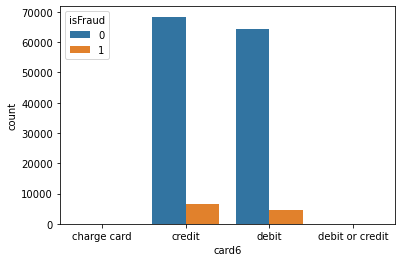

In [47]:
sns.countplot(x='card6', data=df_trimmed, hue='isFraud');

#### Exploring device type

In [48]:
df_trimmed['DeviceType'].value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

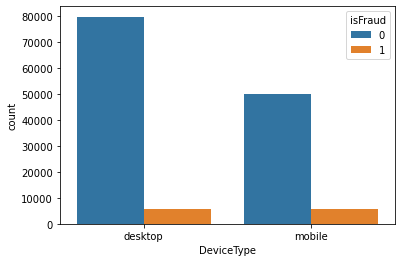

In [49]:
sns.countplot(x='DeviceType', data=df_trimmed, hue='isFraud');

Mobile has a higher proportion of fraud than desktop

## Baseline

In [50]:
df_trimmed['isFraud'].value_counts(normalize=True)

0    0.92153
1    0.07847
Name: isFraud, dtype: float64

### Impute for missing value of categorical data & model

In [51]:
cat_columns2 = [col for col in data_categorical if col in df_trimmed.columns]

In [52]:
data_categorical

['ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [53]:
cat_columns1 = [col for col in data_identity.columns if col in df_trimmed.columns]

In [54]:
cat_columns = cat_columns1 + cat_columns2

In [55]:
df_trimmed[cat_columns] = df_trimmed[cat_columns].astype('str')

In [56]:
df_trimmed[cat_columns].replace(np.nan, 'missing', inplace=True)

/Users/luisagonzalez/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [58]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.compose import make_column_transformer, make_column_selector


In [59]:
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144233 entries, 0 to 144232
Data columns (total 85 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   144233 non-null  object 
 1   isFraud         144233 non-null  int64  
 2   TransactionDT   144233 non-null  int64  
 3   TransactionAmt  144233 non-null  float64
 4   ProductCD       144233 non-null  object 
 5   card1           144233 non-null  object 
 6   card2           144233 non-null  object 
 7   card3           144233 non-null  object 
 8   card4           144233 non-null  object 
 9   card5           144233 non-null  object 
 10  card6           144233 non-null  object 
 11  addr1           144233 non-null  object 
 12  addr2           144233 non-null  object 
 13  P_emaildomain   144233 non-null  object 
 14  R_emaildomain   144233 non-null  object 
 15  C2              144233 non-null  float64
 16  C3              144233 non-null  float64
 17  C5        

In [60]:
X = df_trimmed.drop(columns=['isFraud'])
y = df_trimmed['isFraud']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29, stratify=y, train_size=.75)

In [62]:
ct1 = make_column_transformer(
    (SimpleImputer(strategy='most_frequent'), make_column_selector(dtype_exclude=['object', 'category'])),
    (StandardScaler(), make_column_selector(dtype_exclude=['object', 'category'])),
    verbose_feature_names_out=False
)

In [63]:
pipe = make_pipeline(
    ct1, 
    OneHotEncoder(handle_unknown='ignore'),
    LogisticRegression(max_iter=10_000)
)

In [64]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff41b3f07c0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3236d9d90>)],
                                   verbose_feature_names_out=False)),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [65]:
pipe.score(X_train, y_train)

0.9749477693345906

In [66]:
pipe.score(X_test, y_test)

0.9543803211403533

In [67]:
y_preds = pipe.predict(X_test)

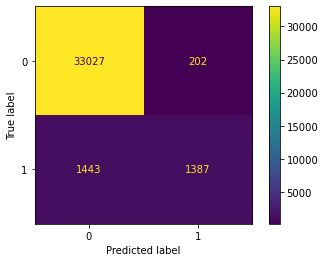

In [68]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [73]:
pipe.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff41b3f07c0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3236d9d90>)],
                                   verbose_feature_names_out=False)),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=10000))])>

In [74]:
pipe.named_steps

{'columntransformer': ColumnTransformer(transformers=[('simpleimputer',
                                  SimpleImputer(strategy='most_frequent'),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff41b3f07c0>),
                                 ('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3236d9d90>)],
                   verbose_feature_names_out=False),
 'onehotencoder': OneHotEncoder(handle_unknown='ignore'),
 'logisticregression': LogisticRegression(max_iter=10000)}

### Trying AdaBoost

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
pipe2 = make_pipeline(
    ct1, 
    OneHotEncoder(handle_unknown='ignore'),
    AdaBoostClassifier(random_state=29, n_estimators=100)
)

In [77]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff41b3f07c0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3236d9d90>)],
                                   verbose_feature_names_out=False)),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('adaboostclassifier',
                 AdaBoostClassifier(n_estimators=100, random_state=29))])

In [78]:
pipe2.score(X_train, y_train)

0.9417604969770924

In [79]:
pipe2.score(X_test, y_test)

0.9416234504561968

In [80]:
y_preds2 = pipe2.predict(X_test)

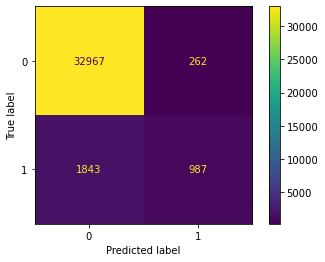

In [81]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds2)

In [82]:
pipe3 = make_pipeline(
    ct1, 
    OneHotEncoder(handle_unknown='ignore'),
)

In [83]:
X_train_pipe = pipe3.fit_transform(X_train)

In [84]:
#X_train_pipe = X_train_pipe.A

In [85]:
X_test_pipe = pipe3.transform(X_test)

In [86]:
#X_test_pipe = X_test_pipe.A

In [87]:
ada = AdaBoostClassifier(random_state=29, n_estimators=50)

In [88]:
ada.fit(X_train_pipe, y_train)

AdaBoostClassifier(random_state=29)

In [89]:
ada.score(X_train_pipe, y_train)

0.9392367851794331

In [90]:
ada.score(X_test_pipe, y_test)

0.9399040461465931

#### Try again without column_transformer

In [64]:
X1 = df_trimmed.drop(columns=['isFraud'])
y1 = df_trimmed['isFraud']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=29, stratify=y1, train_size=.75)

In [66]:
# Impute NaNs of numeric columns
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

/var/folders/64/vnlnt1cx08978qdm8xrbz0g00000gn/T/ipykernel_10346/2432527819.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train = X_train.fillna(X_train.mean())
/var/folders/64/vnlnt1cx08978qdm8xrbz0g00000gn/T/ipykernel_10346/2432527819.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test = X_test.fillna(X_test.mean())


In [67]:
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
num_cols[:5]

['TransactionDT', 'TransactionAmt', 'C2', 'C3', 'C5']

In [68]:
cat_cols = [col for col in X_train.columns if col not in num_cols]

In [69]:
cat_cols[:5]

['TransactionID', 'ProductCD', 'card1', 'card2', 'card3']

In [70]:
from sklearn.compose import make_column_transformer

In [72]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [73]:
smart_encoder = make_column_transformer(
(ohe, cat_cols),
remainder='passthrough', #don't drop the other columns
verbose_feature_names_out=False
)

In [ ]:
smart_encoder.fit(X_train)